<a href="https://colab.research.google.com/github/Tilak46-R/-Customer-Purchase-Behavior-Analysis-using-Descriptive-Statistics/blob/main/Tilak_Assignment_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

**Know your Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')

In [3]:
data = df.copy()


In [4]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
data.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


This dataset contains special characters like ## hence we need to remove them.

In [14]:
df = df[~df['Dt_Customer'].str.contains("########")]

In [15]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


In [6]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.shape

(2240, 22)

In [ ]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

# **Check for Duplicates**

In [8]:
dup = len(df[df.duplicated()])

In [9]:
dup

0

In [12]:
df = df[~df['Dt_Customer'].str.contains("########")]

In [13]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0


#**Handling missing values**

A dataset may contain lots of data as null values.
These null values may cause error while executing any code or while plotting graphs.
So, this null values must be checked before operating on data.

In [ ]:
column_with_nan = data.isnull().sum().sort_values(ascending=False)

In [ ]:
column_with_nan

Income                 24
Id                      0
MntFishProducts         0
Response                0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
NumDealsPurchases       0
MntGoldProds            0
MntSweetProducts        0
MntMeatProducts         0
Year_Birth              0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Complain                0
dtype: int64

In [ ]:
data["Income"].fillna(value =0, inplace = True)

In [ ]:
data.isnull().sum().sort_values(ascending = False)

Id                     0
Year_Birth             0
Response               0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
NumDealsPurchases      0
MntGoldProds           0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Complain               0
dtype: int64

In [ ]:
data.shape

(2240, 22)

## **AGE OF CUSTOMERS**

In [64]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [68]:
from datetime import datetime

df['Year_Birth'] = pd.to_datetime(df['Year_Birth'],format='%Y')

#Calculating the age of customers by taking a difference between their year of birth and enrollment

df['Age'] = (df['Dt_Customer'] - df['Year_Birth']).astype('<m8[Y]')

In [67]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,44.0
1,1,1961-01-01,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,53.0
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,56.0
5,7348,1958-01-01,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,32,43,1,4,7,5,2,1,0,56.0
6,4073,1954-01-01,2n Cycle,Married,63564.0,0,0,2014-01-29,0,769,...,34,65,1,10,10,7,6,1,0,60.0


In [69]:
Cust_Age_group = data['Year_Birth'].value_counts()

In [70]:
Cust_Age_group.head(10)

1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1965    74
1973    74
1969    71
1974    69
Name: Year_Birth, dtype: int64

We can see that people born in 1976 have are more in the dataset with a number of 89 followed by 1971,75 etc..
However people born before 1950 are neglible from the dataset.

In [92]:
edu = data['Education'].value_counts()

In [93]:
edu

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [95]:
martial = data['Marital_Status'].value_counts()

In [96]:
martial

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

## **Various Distributions of the important variables**

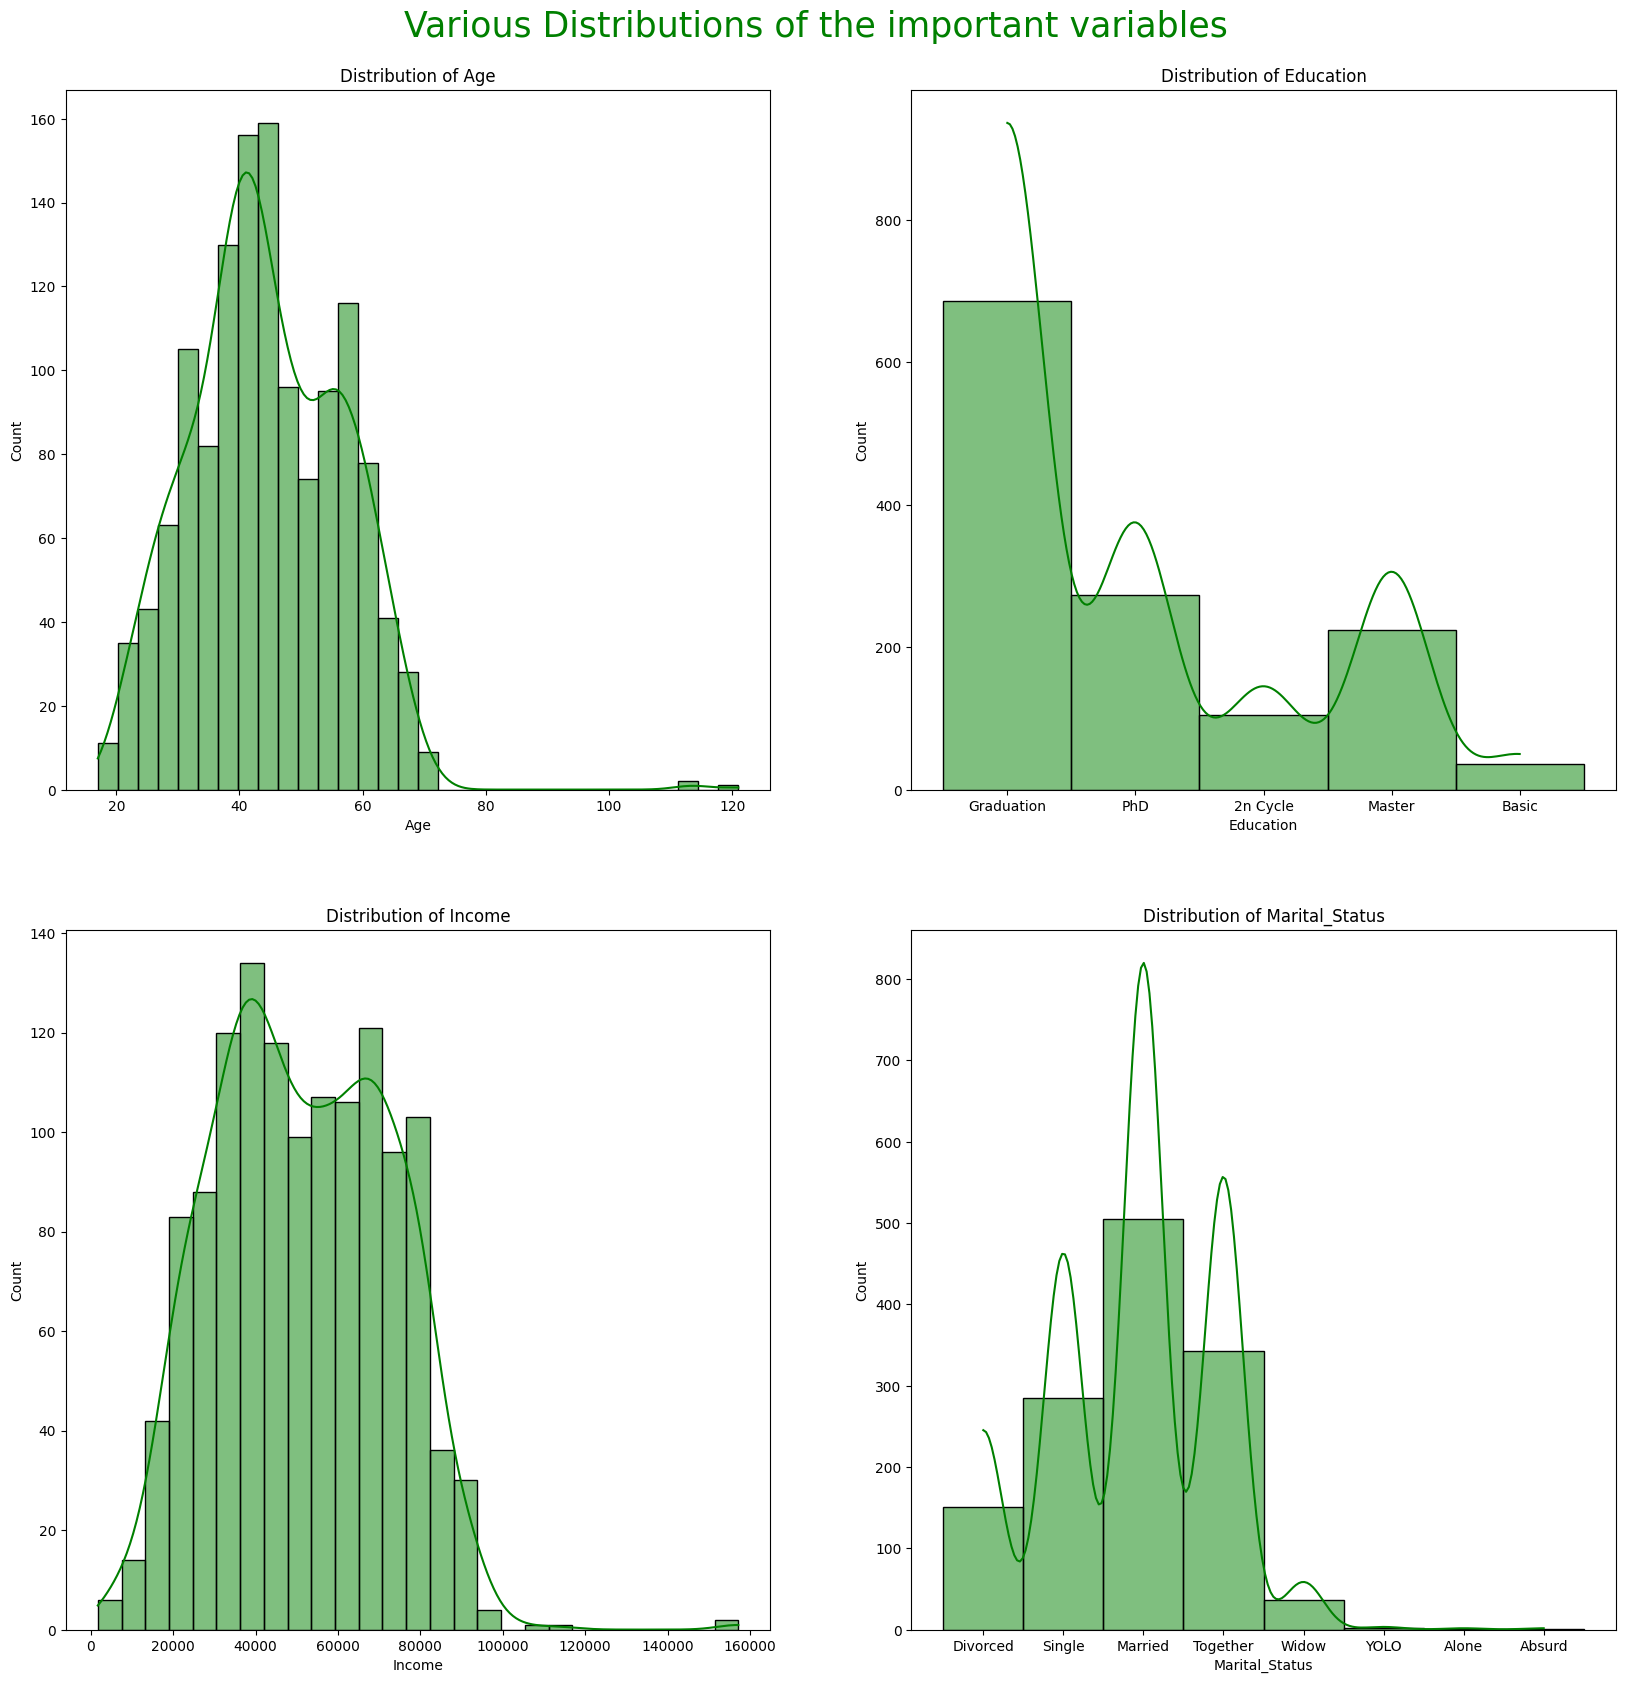

In [91]:
imp_variables = ['Age','Education','Income','Marital_Status']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
fig.suptitle('Various Distributions of the important variables', y = 0.92 ,color = 'g', fontsize = 25)

axes = axes.flatten()

for i, var in enumerate(df[imp_variables]):
  sns.histplot(df[var], kde = True, ax = axes[i], color = 'g')
  axes[i].set_title(f"Distribution of {var}")

for i in range(len(df[imp_variables]), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout
plt.show()

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


## **MEAN**

In [99]:
mean_value = np.mean(data)
print(f"Mean of the variables are :\n {mean_value}")

Mean of the variables are :
 Id                      5592.159821
Year_Birth              1968.805804
Income                 52247.251354
Kidhome                    0.444196
Teenhome                   0.506250
Recency                   49.109375
MntWines                 303.935714
MntFruits                 26.302232
MntMeatProducts          166.950000
MntFishProducts           37.525446
MntSweetProducts          27.062946
MntGoldProds              44.021875
NumDealsPurchases          2.325000
NumWebPurchases            4.084821
NumCatalogPurchases        2.662054
NumStorePurchases          5.790179
NumWebVisitsMonth          5.316518
Response                   0.149107
Complain                   0.009375
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## **Since there are multiple data types it is better to have a selected list of numeric value for calculating the central tendencies and dispersion.**

In [101]:
selected_list = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']

In [102]:
mean = df[selected_list].mean()
print(f"Mean of the variables are :\n {mean}")

Mean of the variables are :
 Age                     44.355740
Income               51429.747521
Recency                 49.348187
MntWines               301.964502
MntFruits               25.218278
MntMeatProducts        162.177492
MntFishProducts         36.485650
NumDealsPurchases        2.325529
MntGoldProds            44.107251
NumWebPurchases          4.092145
NumWebVisitsMonth        5.409366
dtype: float64


In [106]:
mean_data = pd.DataFrame({'Category': mean.index, 'Mean': mean.values})

In [107]:
mean_data

,Category,Mean
0,Age,44.355740
1,Income,51429.747521
2,Recency,49.348187
3,MntWines,301.964502
4,MntFruits,25.218278
5,MntMeatProducts,162.177492
6,MntFishProducts,36.485650
7,NumDealsPurchases,2.325529
8,MntGoldProds,44.107251
9,NumWebPurchases,4.092145


## **MEDIAN**

In [108]:
median = df[selected_list].median()
print(f"Median of the variables are :\n {median}")

Median of the variables are :
 Age                     43.0
Income               50447.0
Recency                 50.0
MntWines               171.0
MntFruits                7.0
MntMeatProducts         65.5
MntFishProducts         11.0
NumDealsPurchases        2.0
MntGoldProds            24.5
NumWebPurchases          4.0
NumWebVisitsMonth        6.0
dtype: float64


In [109]:
med_data = pd.DataFrame({'Category': median.index, 'Median': median.values})

In [110]:
med_data

,Category,Median
0,Age,43.0
1,Income,50447.0
2,Recency,50.0
3,MntWines,171.0
4,MntFruits,7.0
5,MntMeatProducts,65.5
6,MntFishProducts,11.0
7,NumDealsPurchases,2.0
8,MntGoldProds,24.5
9,NumWebPurchases,4.0


## **MODE**

In [114]:
key_variable2 = ['Kidhome','Teenhome','MntWines','NumWebVisitsMonth','Complain','Response','Income',"Age"]
mode = df[key_variable2].mode()
print(f'mode of salected columns of datasets are:\n {mode}')

mode of salected columns of datasets are:
    Kidhome  Teenhome  MntWines  NumWebVisitsMonth  Complain  Response  \
0      0.0       0.0       2.0                7.0       0.0       0.0   
1      NaN       NaN       NaN                NaN       NaN       NaN   

    Income   Age  
0   7500.0  41.0  
1  35860.0   NaN  


## **MEASURES OF DISPERSION**






## **VARIANCE**

In [115]:
selected_list = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','NumDealsPurchases','MntGoldProds','NumWebPurchases','NumWebVisitsMonth']

Variance = df[selected_list].var()
print(f"Variance of selected items are :\n {Variance}")

Variance of selected items are :
 Age                  1.476791e+02
Income               4.393294e+08
Recency              8.303541e+02
MntWines             1.145089e+05
MntFruits            1.489002e+03
MntMeatProducts      4.805031e+04
MntFishProducts      2.962155e+03
NumDealsPurchases    3.672485e+00
MntGoldProds         2.785360e+03
NumWebPurchases      7.701253e+00
NumWebVisitsMonth    5.935090e+00
dtype: float64


## **STANDARD DEVIATION**

In [116]:
standard_deviation = df[selected_list].std()
print(f"Standard deviation of selected items are : \n {standard_deviation}")

Standard deviation of selected items are : 
 Age                     12.152329
Income               20960.186407
Recency                 28.815866
MntWines               338.391676
MntFruits               38.587591
MntMeatProducts        219.203801
MntFishProducts         54.425681
NumDealsPurchases        1.916373
MntGoldProds            52.776506
NumWebPurchases          2.775113
NumWebVisitsMonth        2.436204
dtype: float64


## **HANDLING OUTLIERS USING BOXPLOT**

In [ ]:
import numpy as np


q1 = np.quantile(data['Year_Birth'], 0.25)
q2 = np.quantile(data['Year_Birth'], 0.5)
q3 = np.quantile(data['Year_Birth'], 0.75)

print("Q1 value is:", q1)
print("Q2 value is:", q2)
print("Q3 value is:", q3)

Q1 value is: 1959.0
Q2 value is: 1970.0
Q3 value is: 1977.0


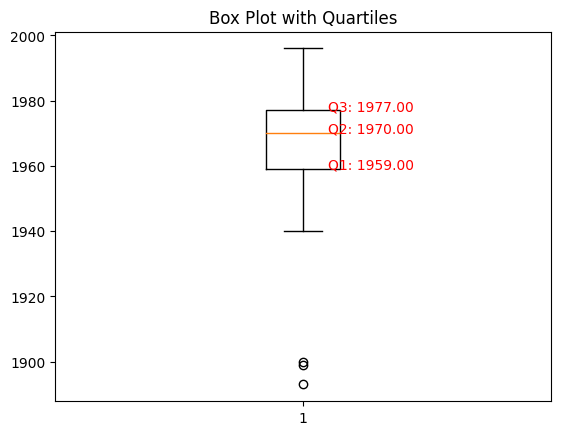

In [ ]:
q1, q2 ,q3 = np.percentile(data['Year_Birth'], [25,50,75])
plt.boxplot(data['Year_Birth'])
plt.title("Box Plot with Quartiles")
plt.text(1.05, q1, f"Q1: {q1:.2f}", fontsize=10, color="r")
plt.text(1.05, q2, f"Q2: {q2:.2f}", fontsize=10, color="r")
plt.text(1.05, q3, f"Q3: {q3:.2f}", fontsize=10, color="r")
plt.show()

Here we can observe that the 25,50,75 percentile values are 1959,1970,1977 and the outliers are below 1900's.Hence we can remove them from consideration.

In [ ]:
new_data = df.copy()

In [ ]:
std = np.std(new_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
std


Id                      3245.937415
Year_Birth                11.981394
Income                 25167.396174
Kidhome                    0.538278
Teenhome                   0.544417
Recency                   28.955987
MntWines                 336.522251
MntFruits                 39.764555
MntMeatProducts          225.664984
MntFishProducts           54.616784
MntSweetProducts          41.271283
MntGoldProds              52.155793
NumDealsPurchases          1.931806
NumWebPurchases            2.778094
NumCatalogPurchases        2.922448
NumStorePurchases          3.250232
NumWebVisitsMonth          2.426103
Response                   0.356194
Complain                   0.096370
dtype: float64

In [ ]:
variance = np.var(new_data)
variance

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Id                     1.053611e+07
Year_Birth             1.435538e+02
Income                 6.333978e+08
Kidhome                2.897431e-01
Teenhome               2.963895e-01
Recency                8.384492e+02
MntWines               1.132472e+05
MntFruits              1.581220e+03
MntMeatProducts        5.092468e+04
MntFishProducts        2.982993e+03
MntSweetProducts       1.703319e+03
MntGoldProds           2.720227e+03
NumDealsPurchases      3.731875e+00
NumWebPurchases        7.717805e+00
NumCatalogPurchases    8.540703e+00
NumStorePurchases      1.056401e+01
NumWebVisitsMonth      5.885977e+00
Response               1.268742e-01
Complain               9.287109e-03
dtype: float64

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



In [ ]:
import numpy as np
import scipy.stats as stats

mean_value = new_data.mean().mean()
std = new_data.std().mean()
prob = stats.norm.cdf(2) - stats.norm.cdf(-2)
print(f"Mean: {mean_value:.2f}, Standard Deviation: {std:.2f}, Probability: {prob:.2f}")



Mean: 3183.39, Standard Deviation: 1538.19, Probability: 0.95


<ipython-input-91-b0766e666332>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = new_data.mean().mean()
<ipython-input-91-b0766e666332>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = new_data.std().mean()


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

INCOME

In [ ]:
 # Group the data frame by year and item and extract a number of stats from each group
Edu_details= data['Education'].value_counts()

In [ ]:
Edu_details

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

It is evident that people with graduation are frequently visiting the store and people with basic education visits the store least.

In [ ]:
Martial_details = data['Marital_Status'].value_counts()

In [ ]:
Martial_details

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

It is evident that people who are Married are frequently visiting the store and people who are alone, absurd or yolo visits the store least.

In [ ]:
Age_factor = data['Year_Birth'].value_counts().sort_values(ascending = True)

In [ ]:
data_frame = pd.DataFrame(Age_factor).rename(columns = {'Year_Birth': "COUNTS"})

In [ ]:
data_frame

,COUNTS
1900,1
1893,1
1940,1
1941,1
1899,1
1996,2
1994,3
1995,5
1993,5
1943,7


## **Summary:**

From the above estimation we can target audiences such as people who are married and have a graduation and whose year of birth is greater than 1960 will be the best choice.

In [ ]:
columns = ['Id','Income','Education','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [ ]:
money_spent = pd.DataFrame(data[columns])

In [ ]:
money_spent

,Id,Income,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1826,84835.0,Graduation,189,104,379,111,189,218
1,1,57091.0,Graduation,464,5,64,7,0,37
2,10476,67267.0,Graduation,134,11,59,15,2,30
3,1386,32474.0,Graduation,10,0,1,0,0,0
4,5371,21474.0,Graduation,6,16,24,11,0,34
...,...,...,...,...,...,...,...,...,...
2235,10142,66476.0,PhD,372,18,126,47,48,78
2236,5263,31056.0,2n Cycle,5,10,13,3,8,16
2237,22,46310.0,Graduation,185,2,88,15,5,14
2238,528,65819.0,Graduation,267,38,701,149,165,63


In [ ]:
from collections import Counter

# Create a Counter object with the list of IDs
counter = Counter(data['Id'])

# Print the count of each ID
for Id, count in counter.items():
    print(f'{Id}: {count}')

1826: 1
1: 1
10476: 1
1386: 1
5371: 1
7348: 1
4073: 1
1991: 1
4047: 1
9477: 1
2079: 1
5642: 1
10530: 1
2964: 1
10311: 1
837: 1
10521: 1
10175: 1
1473: 1
2795: 1
2285: 1
115: 1
10470: 1
4065: 1
10968: 1
5985: 1
5430: 1
8432: 1
453: 1
9687: 1
8890: 1
9264: 1
5824: 1
5794: 1
3068: 1
7962: 1
2681: 1
10141: 1
3725: 1
3767: 1
5585: 1
7030: 1
1524: 1
3657: 1
5740: 1
9595: 1
3158: 1
5114: 1
340: 1
8805: 1
1241: 1
1402: 1
7264: 1
1619: 1
6398: 1
1857: 1
4877: 1
3066: 1
10286: 1
1992: 1
4246: 1
10623: 1
4867: 1
3112: 1
4865: 1
6287: 1
4405: 1
5332: 1
1519: 1
9080: 1
1772: 1
5341: 1
5510: 1
3887: 1
7022: 1
9999: 1
10352: 1
7919: 1
4114: 1
7990: 1
9888: 1
4399: 1
4452: 1
4785: 1
8461: 1
3878: 1
9612: 1
4098: 1
158: 1
3896: 1
9970: 1
4002: 1
10914: 1
7279: 1
10582: 1
4470: 1
6183: 1
6379: 1
8601: 1
4827: 1
6715: 1
10676: 1
1041: 1
492: 1
11133: 1
4491: 1
873: 1
1631: 1
8278: 1
6815: 1
254: 1
1349: 1
2534: 1
2130: 1
2296: 1
3799: 1
11084: 1
5172: 1
9504: 1
850: 1
4477: 1
1945: 1
7685: 1
6310: 1
1083

In [ ]:
grad = data.loc[:,'Education']=='Graduation'
grad.head()

0    True
1    True
2    True
3    True
4    True
Name: Education, dtype: bool

## **AMOUNT REMAINING AFTER EVERY PURCHASES**

In [ ]:
columns = ['Id','Income','Education','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [ ]:
data.loc[:,'Income_spent'] = data.loc[:,'Income'] - data.loc[:,'MntWines']  - data.loc[:,'MntFruits'] - data.loc[:,'MntMeatProducts'] - data.loc[:,'MntFishProducts'] - data.loc[:,'MntSweetProducts'] - data.loc[:,'MntGoldProds']

In [ ]:
data.loc[:,'Income_spent']

0       83645.0
1       56514.0
2       67016.0
3       32463.0
4       21383.0
         ...   
2235    65787.0
2236    31001.0
2237    46001.0
2238    64436.0
2239    93793.0
Name: Income_spent, Length: 2240, dtype: float64

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍